**Fourier Feature Network using DeepXDE module**

In [1]:
import os
os.environ["DDE_BACKEND"] = "tensorflow.compat.v1"

import deepxde as dde


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
# from torch.optim.lr_scheduler import ReduceLROnPlateau

Data loading

In [3]:
datastore = h5py.File("C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/datasets/trials_many_alldata_new_eqution2.h5", 'r')
data_I = np.array(np.array(datastore["I"]))

data_c = np.array(np.array(datastore["c"]))
data_h = np.array(np.array(datastore["h"]))
t = np.linspace(0, 1, 601).reshape(601, 1)

Train-test split

In [4]:
train_label, test_label = train_test_split(range(len(data_I)), test_size=0.25, random_state=42)

data_i_train = data_I[train_label,:]
data_i_test = data_I[test_label,:]

data_c_train = data_c[train_label,:]
data_c_test = data_c[test_label,:]

data_h_train = data_h[train_label,:]
data_h_test = data_h[test_label,:]

In [5]:
# d_train = np.load("C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/datasets/deepxde_deeponet_trial/deeponet_antiderivative_aligned/antiderivative_aligned_train.npz", allow_pickle=True)
# X_train = (d_train["X"][0].astype(np.float32), d_train["X"][1].astype(np.float32))
# y_train = d_train["y"].astype(np.float32)

In [6]:
X_train = data_i_train.astype(np.float32)
y_train_c = data_c_train.astype(np.float32)

In [7]:
# d_test = np.load("C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/datasets/deepxde_deeponet_trial/deeponet_antiderivative_aligned/antiderivative_aligned_test.npz", allow_pickle=True)
# X_test = (d_test["X"][0].astype(np.float32), d_test["X"][1].astype(np.float32))
# y_test = d_test["y"].astype(np.float32)

In [8]:
X_test = data_i_test.astype(np.float32)
y_test_c = data_c_test.astype(np.float32)

In [9]:
data_c = dde.data.dataset.DataSet(
    X_train=X_train, y_train=y_train_c, X_test=X_test, y_test=y_test_c
)

In [11]:
m = 601
dim_x = 1
net_c = dde.nn.MsFFN(
    [m, 200, 200, 200, m],
    "relu",
    "Glorot normal",
    sigmas = [1, 10]
)

In [13]:
def compute_parameters(layers):
    params = 0
    for i in range(len(layers) - 1):
        params += layers[i] * layers[i + 1]  # Weights
        params += layers[i + 1]             # Biases
    return params

branch_layers = [m, 200, 200, 200, m]

branch_params = compute_parameters(branch_layers)
total_params = branch_params
print(f"Total trainable parameters: {total_params}")


Total trainable parameters: 321601


In [15]:
model_c = dde.Model(data_c, net_c)
# lr = ReduceLROnPlateau(optimizer_combined, mode='min', factor=0.5, patience=5)
model_c.compile("adam", lr=0.001)
losshistory_c, train_state_c = model_c.train(iterations=2000, display_every=100)

Compiling model...
Building Multiscale Fourier Feature Network...

'compile' took 0.308978 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.84e+01]    [1.83e+01]    []  
100       [7.60e-01]    [7.42e-01]    []  
200       [2.64e-01]    [2.66e-01]    []  
300       [1.50e-01]    [1.62e-01]    []  
400       [1.09e-01]    [1.26e-01]    []  
500       [8.75e-02]    [1.08e-01]    []  
600       [7.33e-02]    [9.60e-02]    []  
700       [6.25e-02]    [8.67e-02]    []  
800       [5.52e-02]    [8.13e-02]    []  
900       [5.00e-02]    [7.77e-02]    []  
1000      [4.51e-02]    [7.44e-02]    []  
1100      [4.15e-02]    [7.15e-02]    []  
1200      [3.86e-02]    [6.98e-02]    []  
1300      [3.57e-02]    [6.79e-02]    []  
1400      [3.49e-02]    [6.78e-02]    []  
1500      [3.14e-02]    [6.50e-02]    []  
1600      [3.40e-02]    [6.77e-02]    []  
1700      [2.87e-02]    [6.30e-02]    []  
1800      [2.94e-02]    [6.43e-02]    []  
1900      [2.64e-02]

In [16]:
y_train_h = data_h_train.astype(np.float32)
y_test_h = data_h_test.astype(np.float32)

In [17]:
data_h = dde.data.dataset.DataSet(
    X_train=X_train, y_train=y_train_h, X_test=X_test, y_test=y_test_h
)

In [20]:
m = 601
dim_x = 1
net_h = dde.nn.MsFFN(
    [m, 200, 200, 200, m],
    "relu",
    "Glorot normal",
    sigmas = [1, 10]
)

In [26]:
model_h = dde.Model(data_h, net_h)
# lr = ReduceLROnPlateau(optimizer_combined, mode='min', factor=0.5, patience=5)
model_h.compile("adam", lr=0.001)
losshistory_h, train_state_h = model_h.train(iterations=2000, display_every=100)

Compiling model...
Building Multiscale Fourier Feature Network...
'compile' took 0.283643 s

Training model...

Step      Train loss    Test loss     Test metric
0         [2.57e-01]    [2.59e-01]    []  
100       [6.92e-03]    [7.04e-03]    []  
200       [3.96e-03]    [4.20e-03]    []  
300       [2.86e-03]    [3.24e-03]    []  
400       [2.46e-03]    [2.95e-03]    []  
500       [2.14e-03]    [2.72e-03]    []  
600       [1.94e-03]    [2.59e-03]    []  
700       [1.81e-03]    [2.54e-03]    []  
800       [1.66e-03]    [2.42e-03]    []  
900       [1.51e-03]    [2.29e-03]    []  
1000      [1.50e-03]    [2.28e-03]    []  
1100      [1.53e-03]    [2.34e-03]    []  
1200      [1.40e-03]    [2.29e-03]    []  
1300      [1.44e-03]    [2.30e-03]    []  
1400      [1.28e-03]    [2.17e-03]    []  
1500      [1.19e-03]    [2.10e-03]    []  
1600      [1.29e-03]    [2.18e-03]    []  
1700      [1.10e-03]    [2.07e-03]    []  
1800      [1.23e-03]    [2.24e-03]    []  
1900      [1.03e-03] 

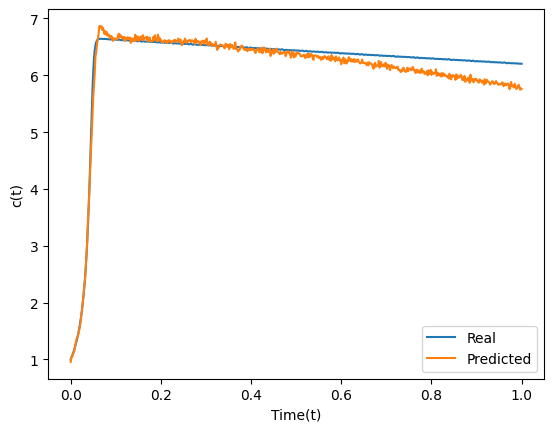

In [29]:
n = np.random.randint(0, len(data_h_test))
pred_c = model_c.predict(data_i_test[n].reshape(1, -1))
plt.figure()
plt.plot(t, data_c_test[n], label="Real")
plt.plot(t, pred_c.T, label="Predicted")
plt.xlabel("Time(t)")
plt.ylabel("c(t)")
plt.legend()
plt.show()

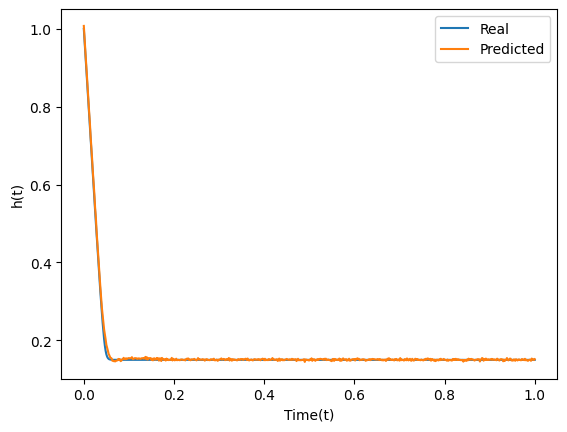

In [30]:
pred_h = model_h.predict(data_i_test[n].reshape(1, -1))
plt.figure()
plt.plot(t, data_h_test[n], label="Real")
plt.plot(t, pred_h.T, label="Predicted")
plt.xlabel("Time(t)")
plt.ylabel("h(t)")
plt.legend()
plt.show()

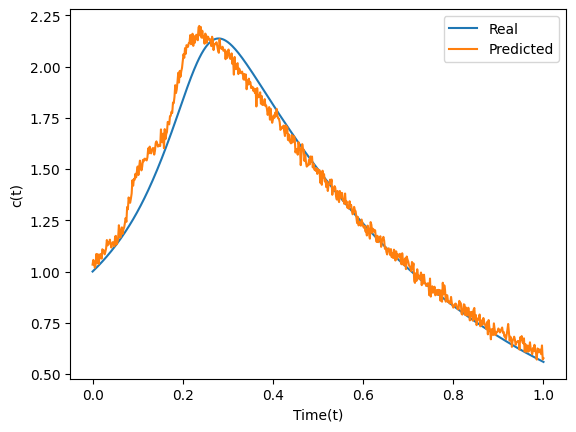

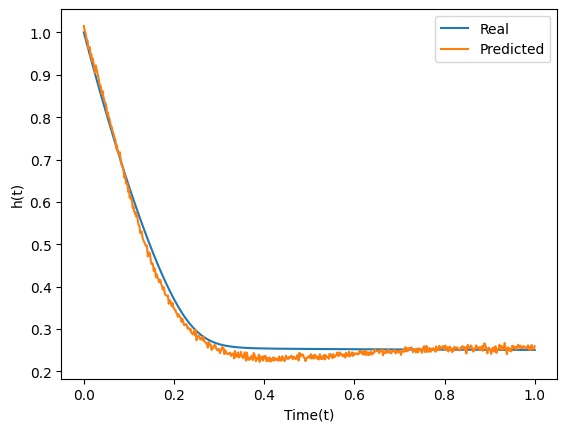

In [31]:
n = np.random.randint(0, len(data_h_test))
pred_c = model_c.predict(data_i_test[n].reshape(1, -1))
plt.figure()
plt.plot(t, data_c_test[n], label="Real")
plt.plot(t, pred_c.T, label="Predicted")
plt.xlabel("Time(t)")
plt.ylabel("c(t)")
plt.legend()
plt.show()

pred_h = model_h.predict(data_i_test[n].reshape(1, -1))
plt.figure()
plt.plot(t, data_h_test[n], label="Real")
plt.plot(t, pred_h.T, label="Predicted")
plt.xlabel("Time(t)")
plt.ylabel("h(t)")
plt.legend()
plt.show()

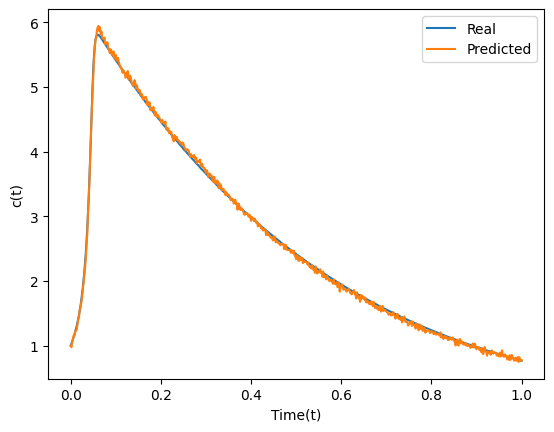

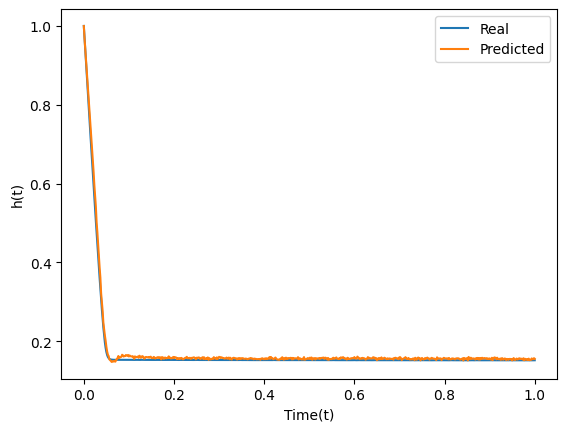

In [32]:
n = np.random.randint(0, len(data_h_test))
pred_c = model_c.predict(data_i_test[n].reshape(1, -1))
plt.figure()
plt.plot(t, data_c_test[n], label="Real")
plt.plot(t, pred_c.T, label="Predicted")
plt.xlabel("Time(t)")
plt.ylabel("c(t)")
plt.legend()
plt.show()

pred_h = model_h.predict(data_i_test[n].reshape(1, -1))
plt.figure()
plt.plot(t, data_h_test[n], label="Real")
plt.plot(t, pred_h.T, label="Predicted")
plt.xlabel("Time(t)")
plt.ylabel("h(t)")
plt.legend()
plt.show()

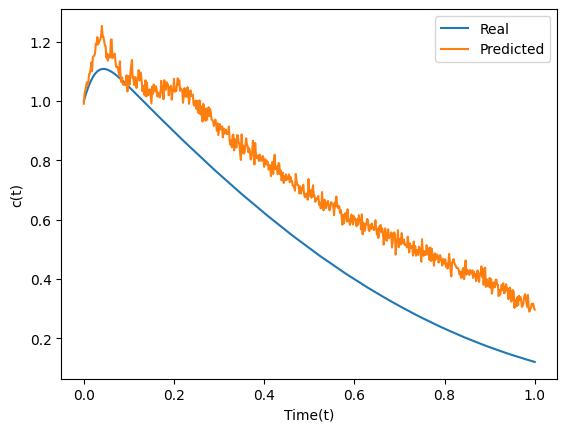

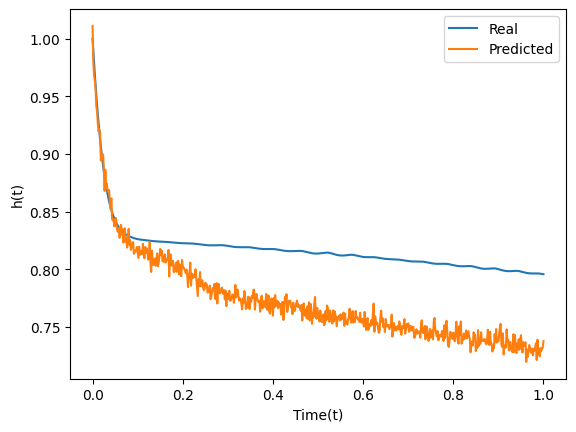

In [33]:
n = np.random.randint(0, len(data_h_test))
pred_c = model_c.predict(data_i_test[n].reshape(1, -1))
plt.figure()
plt.plot(t, data_c_test[n], label="Real")
plt.plot(t, pred_c.T, label="Predicted")
plt.xlabel("Time(t)")
plt.ylabel("c(t)")
plt.legend()
plt.show()

pred_h = model_h.predict(data_i_test[n].reshape(1, -1))
plt.figure()
plt.plot(t, data_h_test[n], label="Real")
plt.plot(t, pred_h.T, label="Predicted")
plt.xlabel("Time(t)")
plt.ylabel("h(t)")
plt.legend()
plt.show()

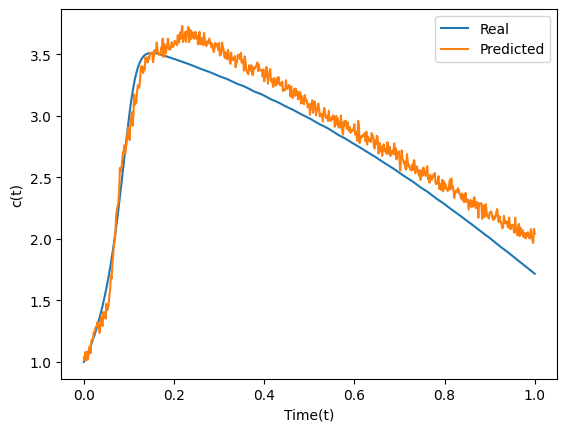

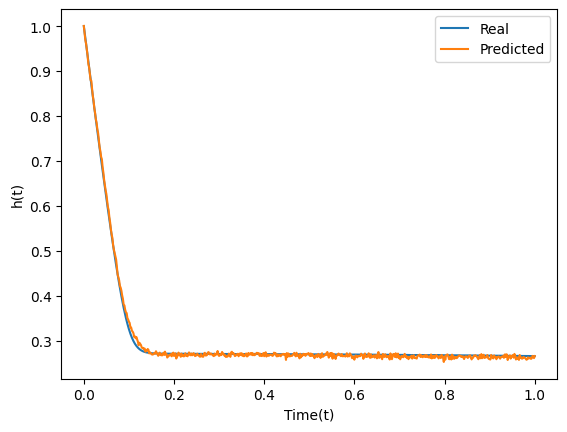

In [34]:
n = np.random.randint(0, len(data_h_test))
pred_c = model_c.predict(data_i_test[n].reshape(1, -1))
plt.figure()
plt.plot(t, data_c_test[n], label="Real")
plt.plot(t, pred_c.T, label="Predicted")
plt.xlabel("Time(t)")
plt.ylabel("c(t)")
plt.legend()
plt.show()

pred_h = model_h.predict(data_i_test[n].reshape(1, -1))
plt.figure()
plt.plot(t, data_h_test[n], label="Real")
plt.plot(t, pred_h.T, label="Predicted")
plt.xlabel("Time(t)")
plt.ylabel("h(t)")
plt.legend()
plt.show()

In [27]:
path = "C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/models/model_c_ffn"
model_c.save(path)

INFO:tensorflow:C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/models/model_c_ffn-2000.ckpt is not in all_model_checkpoint_paths. Manually adding it.


'C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/models/model_c_ffn-2000.ckpt'

In [28]:
path = "C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/models/model_h_ffn"
model_h.save(path)

INFO:tensorflow:C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/models/model_h_ffn-2000.ckpt is not in all_model_checkpoint_paths. Manually adding it.


'C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/models/model_h_ffn-2000.ckpt'